In [1]:
import pandas as pd
from itertools import product
import numpy as np
import matplotlib.pyplot as plt
from utils import *

In [2]:
df = pd.read_csv("../reports/batch_size_drift/v1.csv.zip")
df["loss"] = df["loss"].clip(upper=df["loss"].quantile(0.999))
df['accuracy'] *= 100

In [5]:
df_mean = agg_dataframe(df, cols_to_keep=['dataset', 'batch_size', 'n_hidden_layers', 'base_lr'])

In [8]:
df['dataset'].unique()

array(['RBF incr._0.0', 'RBF incr._0.001', 'RBF abrupt', 'RBF incr.',
       'SEA', 'Insects gradual', 'Insects abrupt', 'Insects incr.',
       'Covertype'], dtype=object)

In [6]:
dfp = df_mean[df_mean.dataset.isin(["RBF incr._0.0", "RBF incr._0.001"])]
dfp["drift_speed"] = dfp["dataset"].apply(lambda x: x.split("_")[-1])

/tmp/ipykernel_1232984/856450004.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfp["drift_speed"] = dfp["dataset"].apply(lambda x: x.split("_")[-1])


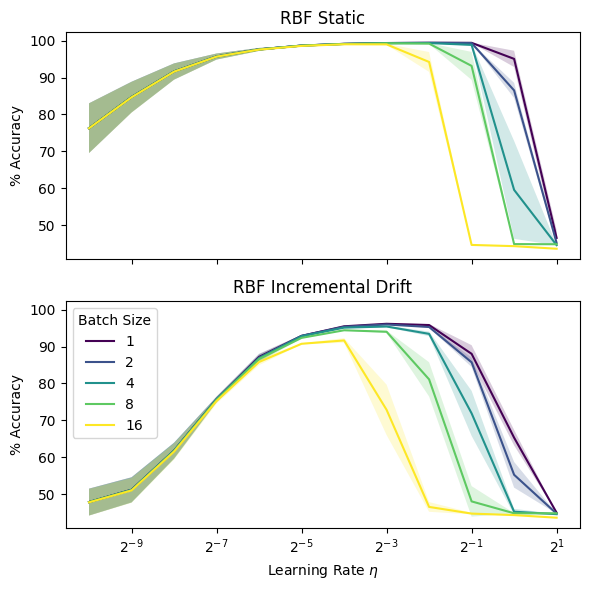

In [11]:
fig, axs = plt.subplots(nrows=2, figsize=(6, 6), sharex=True, sharey=True)
cmapper = ValueColorMapper(dfp["batch_size"].unique())
for ax, (drift_speed, dfs) in zip(axs, dfp.groupby("drift_speed")):
    ax.set_ylabel("Accuracy [%]")
    for batch_size, dfb in dfs.groupby("batch_size"):
        color = cmapper(batch_size)
        y = dfb["accuracy_mean"]
        std = dfb["accuracy_std"]
        ax.plot(dfb["base_lr"], y, c=color, label=batch_size)
        ax.fill_between(dfb["base_lr"], y - std, y + std, color=color, edgecolor='none', alpha=0.2)

ax.set_xscale("log", base=2)
ax.set_xlabel(r"Learning Rate $\eta$")
axs[0].set_title("Static", fontsize=12)
axs[1].set_title("Incremental Drift", fontsize=12)
axs[1].legend(title="Batch Size", loc="upper left")
plt.tight_layout()
plt.savefig("../pub/figures/batch_size_lr_wstd.pdf")

In [7]:
df_mean

,dataset,batch_size,n_hidden_layers,base_lr,seed_mean,seed_std,step_mean,step_std,runtime_mean,runtime_std,accuracy_mean,accuracy_std,loss_mean,loss_std
0,Covertype,1,1,0.000977,2.0,1.581139,50050.0,0.0,0.027308,0.000172,68.2942,1.905495,0.330235,0.012791
1,Covertype,1,1,0.001953,2.0,1.581139,50050.0,0.0,0.027260,0.000168,66.6750,0.181393,0.284716,0.000868
2,Covertype,1,1,0.003906,2.0,1.581139,50050.0,0.0,0.027276,0.000133,67.0244,0.088359,0.247728,0.000640
3,Covertype,1,1,0.007812,2.0,1.581139,50050.0,0.0,0.027401,0.000235,67.4812,0.050529,0.225098,0.000818
4,Covertype,1,1,0.015625,2.0,1.581139,50050.0,0.0,0.027330,0.000102,68.0416,0.031659,0.211395,0.001290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,SEA,16,1,0.125000,2.0,1.581139,10050.0,0.0,0.002114,0.000059,63.5260,0.033615,0.655282,0.000338
536,SEA,16,1,0.250000,2.0,1.581139,10050.0,0.0,0.002103,0.000042,62.5750,0.014577,0.661104,0.000510
537,SEA,16,1,0.500000,2.0,1.581139,10050.0,0.0,0.002105,0.000023,61.0520,0.013964,0.680090,0.002797
538,SEA,16,1,1.000000,2.0,1.581139,10050.0,0.0,0.002091,0.000035,56.7590,0.045607,0.791803,0.002622


Text(0.5, 0, 'Timestep')

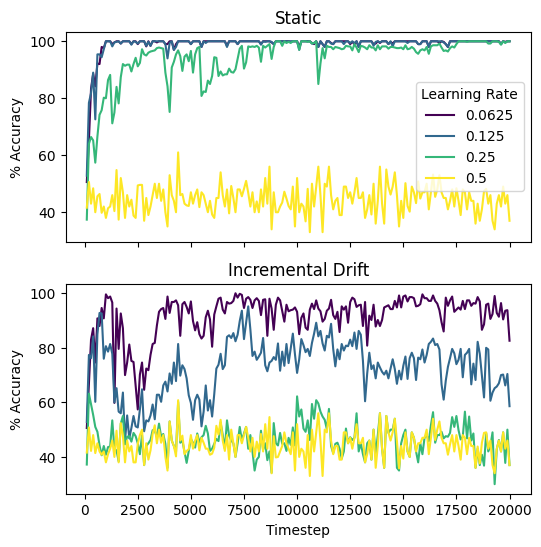

In [18]:
dfm = agg_dataframe(df, cols_to_keep=["dataset", "batch_size", "step", "base_lr"])
dfc = dfm[dfm.dataset.isin(["RBF incr._0.0", "RBF incr._0.001"])]
dfc["drift_speed"] = dfc["dataset"].apply(lambda x: x.split("_")[-1])
fig, axs = plt.subplots(nrows=2, figsize=(6, 6), sharex=True)
batch_size = 16
lrs = [2**-4, 2**-3, 2**-2, 2**-1]
seed = 0
dfp = dfc[(dfc.batch_size == batch_size) & (dfc.base_lr.isin(lrs))]
cmapper = ValueColorMapper(dfp["base_lr"].unique())
for ax, (drift_speed, dfs) in zip(axs, dfp.groupby("drift_speed")):
    ax.set_ylabel("Accuracy [%]")
    for lr, dflr in dfs.groupby("base_lr"):
        color = cmapper(lr)
        ax.plot(dflr["step"], dflr["accuracy_mean"], color=color, label=lr)

axs[0].set_title("Static", fontsize=12)
axs[1].set_title("Incremental Drift", fontsize=12)
axs[0].legend(title="Learning Rate")
ax.set_xlabel("Timestep")

In [32]:
best_lrs 

,dataset,batch_size,accuracy_mean,n_hidden_layers,base_lr,seed_mean,seed_std,step_mean,step_std,runtime_mean,runtime_std,accuracy_std,loss_mean,loss_std
0,RBF abrupt,1,94.999,1,0.250,2.0,1.581139,10050.0,0.0,0.026896,0.000645,0.324276,0.068789,0.003346
1,RBF abrupt,2,94.914,1,0.250,2.0,1.581139,10050.0,0.0,0.014571,0.000726,0.408983,0.068793,0.003284
2,RBF abrupt,4,94.790,1,0.250,2.0,1.581139,10050.0,0.0,0.007290,0.000081,0.317746,0.068378,0.002423
3,RBF abrupt,8,94.322,1,0.250,2.0,1.581139,10050.0,0.0,0.003907,0.000047,0.264258,0.071938,0.002410
4,RBF abrupt,16,92.934,1,0.125,2.0,1.581139,10050.0,0.0,0.002289,0.000030,0.442993,0.087082,0.003528


In [42]:
df

,base_lr,seed,batch_size,n_hidden_layers,dataset,step,runtime,accuracy,loss
0,2.000000,0,1,1,RBF incr._0.0,100,0.794231,50.0,0.637782
1,2.000000,0,1,1,RBF incr._0.0,200,0.027598,35.0,0.615352
2,2.000000,0,1,1,RBF incr._0.0,300,0.025294,42.0,0.618048
3,2.000000,0,1,1,RBF incr._0.0,400,0.025308,44.0,0.573530
4,2.000000,0,1,1,RBF incr._0.0,500,0.025739,44.0,0.609964
...,...,...,...,...,...,...,...,...,...
1001695,0.000977,4,16,1,Covertype,99600,0.001952,84.0,0.194029
1001696,0.000977,4,16,1,Covertype,99700,0.002193,88.0,0.181452
1001697,0.000977,4,16,1,Covertype,99800,0.001919,62.0,0.253714
1001698,0.000977,4,16,1,Covertype,99900,0.001888,86.0,0.186361


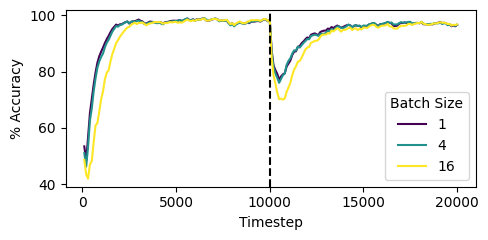

In [70]:
batch_sizes = [1, 4, 16]
best_lrs = get_best_params(
    df_mean[df_mean["dataset"] == "RBF abrupt"],
    params=["accuracy_mean"],
    fixed_params=["dataset", "batch_size"],
    metric="accuracy_mean",
)
dfp = df[(df.batch_size.isin(batch_sizes)) & (df.dataset == "RBF abrupt")]
dfp = dfp.merge(best_lrs, on=['dataset', 'batch_size', 'base_lr'])
dfp = agg_dataframe(dfp, ['dataset', 'batch_size', 'step'])

fig, ax = plt.subplots(figsize=(5, 2.5))
cmapper = ValueColorMapper(dfp["batch_size"].unique())
ax.set_ylabel("Accuracy [%]")
for lr, dfbs in dfp.groupby("batch_size"):
    color = cmapper(lr)
    ys = dfbs["accuracy_mean"].ewm(alpha=0.2).mean()
    ax.plot(dfbs["step"], ys, color=color, label=lr)

ax.axvline(x=10000, color="black", linestyle="--")
ax.legend(title="Batch Size")
ax.set_xlabel("Timestep")
ax.set_xticks(np.arange(0, 20001, 5000))
fig.tight_layout()
fig.savefig("../pub/figures/accuracy_vs_time.pdf", bbox_inches="tight")